In [9]:
#IMPORTAR LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random
from deap import base, creator, tools, algorithms

import warnings
warnings.filterwarnings('ignore')

In [10]:
#IMPORTAR LOS DATOS
tickers = ['PG', 'GE', 'GOOGL', 'AMZN']
datos = pd.DataFrame()

for t in tickers:
    datos[t] = yf.download(t, start = '2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


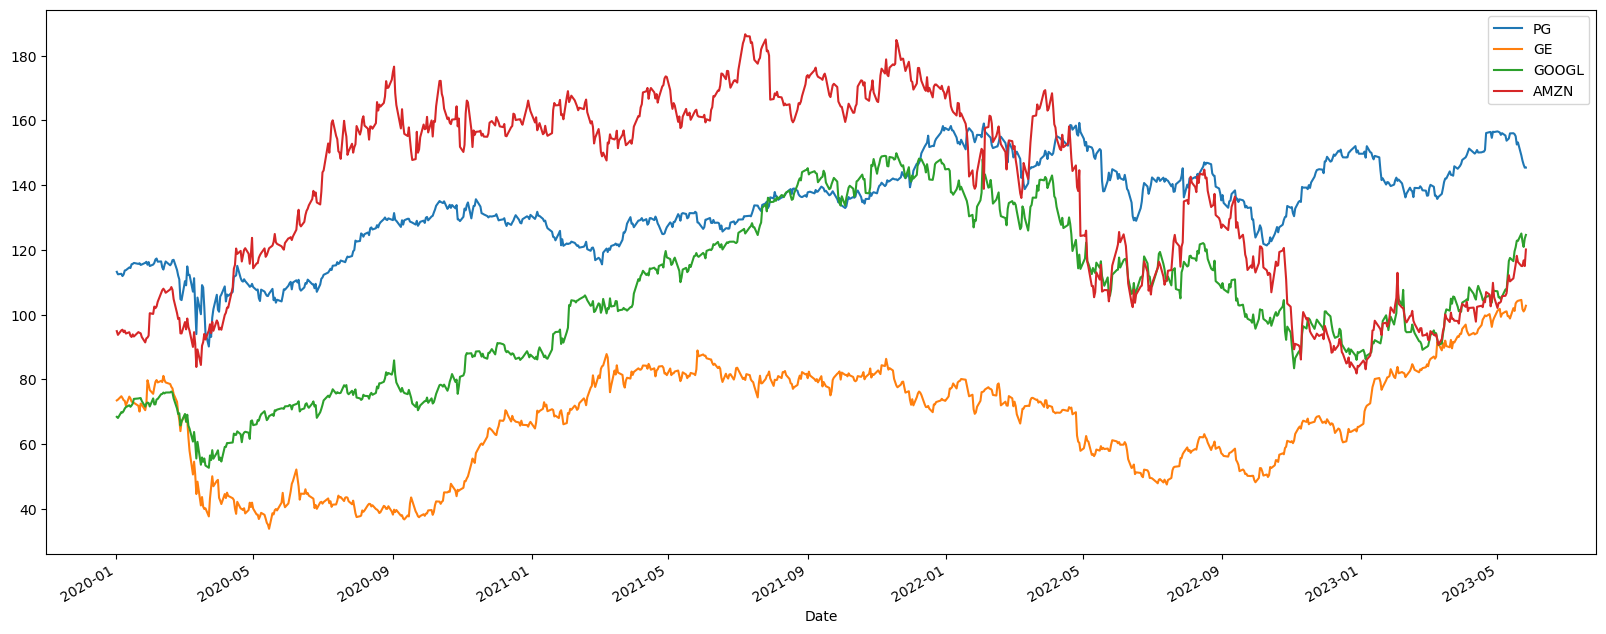

In [11]:
datos.plot(figsize = (20, 8))
plt.show()

In [12]:
#IMPLEMENTACIÓN DEL ALGORITMO EVOLUTIVO
#Función de adaptabilidad
def evaluarPortafolio (individuo, retorno): 
    pesos = np.array(individuo) / np.sum(individuo)
    retornoPortafolio = np.dot((retornoLog.mean() * 250), pesos)
    volatilidadPortafolio = np.sqrt(np.dot(pesos.T, np.dot((retornoLog.cov())* 250), pesos))
    return retornoPortafolio, - volatilidadPortafolio,

In [13]:
#Configuración
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weight = (1.0, 1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)

In [14]:
toolbox.register('attribute', random.uniform, 0.1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n = 4)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [15]:
toolbox.register('evaluate', evaluarPortafolio, retorno = retornoLog)
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxUniform, indpb = 0.5)
toolbox.register('mutate', tools.mutUniformInt, low = 0, up = 1, indpb = 0.1)

NameError: name 'retornoLog' is not defined